<a href="https://colab.research.google.com/github/victornico15/Rede-Neural-Projects/blob/main/SpeechBrain%2BSpeechRecognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INSTALAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
!pip install SpeechRecognition
!pip install pydub
!pip install speechbrain


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#IMPORTAÇÃO DAS BIBLIOTECAS E SEUS PACOTES
import speech_recognition as sr
from pydub import AudioSegment
from pydub.utils import make_chunks
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display as ld
import tensorflow as tensor
import torchaudio
from speechbrain.pretrained import EncoderClassifier
from google.colab import files

In [ ]:
#FUNÇÃO QUE TRANSCREVE AUDIO P/ TEXTO
def transcreve_audio(nome_audio):
  # Selecione o audio para reconhecimento
  r = sr.Recognizer()
  with sr.AudioFile(nome_audio) as source:
    audio = r.record(source)  # leitura do arquivo de audio

  # Reconhecimento usando o Google Speech Recognition
  try:
    print('Google Speech Recognition: ' + r.recognize_google(audio,language='pt-BR'))
    texto = r.recognize_google(audio,language='pt-BR')
  except sr.UnknownValueError:
    print('Google Speech Recognition NÃO ENTENDEU o audio')
    texto = ''
  except sr.RequestError as e:
    print('Erro ao solicitar resultados do serviço Google Speech Recognition; {0}'.format(e))
    texto = ''
  return texto

In [ ]:
#CHAMADA DA FUNÇÃO
transcreve_audio("audio_pt.wav")

Google Speech Recognition: testando o áudio em português elefante borboleta morango


'testando o áudio em português elefante borboleta morango'

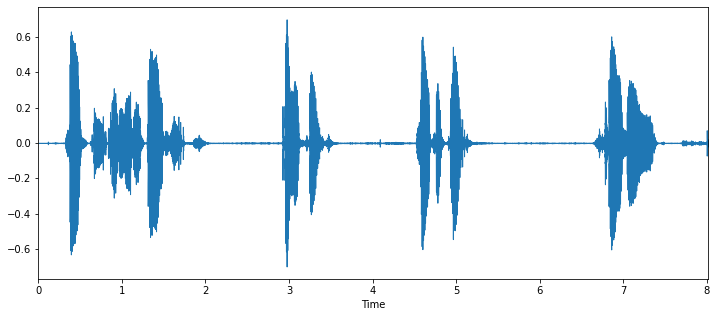

In [ ]:
#DADOS PARA GERAR O ESPECTOGRAMA E A GERAÇÃO DO MESMO
data, fs = librosa.load("audio_en.wav", sr=44100)
Audio(data = data, rate = fs)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)))
plt.figure(figsize=(12, 5))
ld.waveplot(data, sr=fs)

In [ ]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier

language_id = EncoderClassifier.from_hparams(source="TalTechNLP/voxlingua107-epaca-tdnn", savedir="tmp")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.8 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
signal = language_id.load_audio("audio_pt.wav")
prediction =  language_id.classify_batch(signal)

print(prediction)


(tensor([[0.3961, 0.4232, 0.3908, 0.4142, 0.4174, 0.4209, 0.3788, 0.5227, 0.5111,
         0.4350, 0.3669, 0.4320, 0.4877, 0.3906, 0.3113, 0.4567, 0.3850, 0.4303,
         0.4546, 0.4143, 0.4019, 0.4834, 0.3830, 0.3566, 0.3591, 0.4269, 0.3779,
         0.4097, 0.4502, 0.3797, 0.4302, 0.3538, 0.3528, 0.3995, 0.4282, 0.3886,
         0.4795, 0.4317, 0.4302, 0.4796, 0.3574, 0.3230, 0.4194, 0.3877, 0.4540,
         0.3592, 0.3891, 0.4307, 0.4220, 0.3825, 0.3670, 0.3940, 0.4081, 0.4756,
         0.4127, 0.3668, 0.4751, 0.4444, 0.4140, 0.4018, 0.4872, 0.3504, 0.3676,
         0.3934, 0.3696, 0.4170, 0.3816, 0.3786, 0.4128, 0.4046, 0.3990, 0.4408,
         0.3822, 0.5011, 0.4247, 0.8850, 0.4661, 0.4801, 0.3395, 0.3656, 0.4140,
         0.3883, 0.4602, 0.4923, 0.4321, 0.3782, 0.4743, 0.4470, 0.3750, 0.3530,
         0.4163, 0.3267, 0.3694, 0.4258, 0.3614, 0.4137, 0.3954, 0.4415, 0.4301,
         0.4407, 0.4151, 0.3991, 0.3667, 0.3462, 0.4358, 0.4060, 0.3549]]), tensor([0.8850]), tensor([75]), 

In [ ]:
print(prediction[3])
emb =  language_id.encode_batch(signal)
print(emb.shape)

['pt']
torch.Size([1, 1, 256])
